In [2]:
#Cell 1 – imports and data load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

data_path = "telco_customer_churn.csv"
df = pd.read_csv(data_path)

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
#Cell 2 - basic cleaning (TotalCharges, target)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df = df.dropna(subset=["TotalCharges"])

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

print("Rows:", len(df))
print("Overall churn rate: {:.2%}".format(df["Churn"].mean()))


Rows: 7032
Overall churn rate: 26.58%


In [4]:
#Cell 3 – churn rate by key segments
def churn_rate_by(col):
    grouped = df.groupby(col)["Churn"].mean().sort_values(ascending=False)
    return grouped.to_frame("churn_rate")

# By contract
churn_by_contract = churn_rate_by("Contract")
print(churn_by_contract)

# By payment method
churn_by_payment = churn_rate_by("PaymentMethod")
print(churn_by_payment)

# By internet service
churn_by_internet = churn_rate_by("InternetService")
print(churn_by_internet)


                churn_rate
Contract                  
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
                           churn_rate
PaymentMethod                        
Electronic check             0.452854
Mailed check                 0.192020
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
                 churn_rate
InternetService            
Fiber optic        0.418928
DSL                0.189983
No                 0.074342


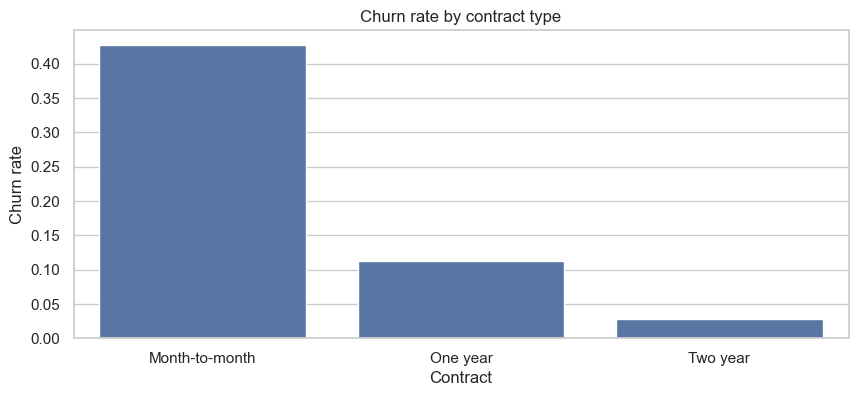

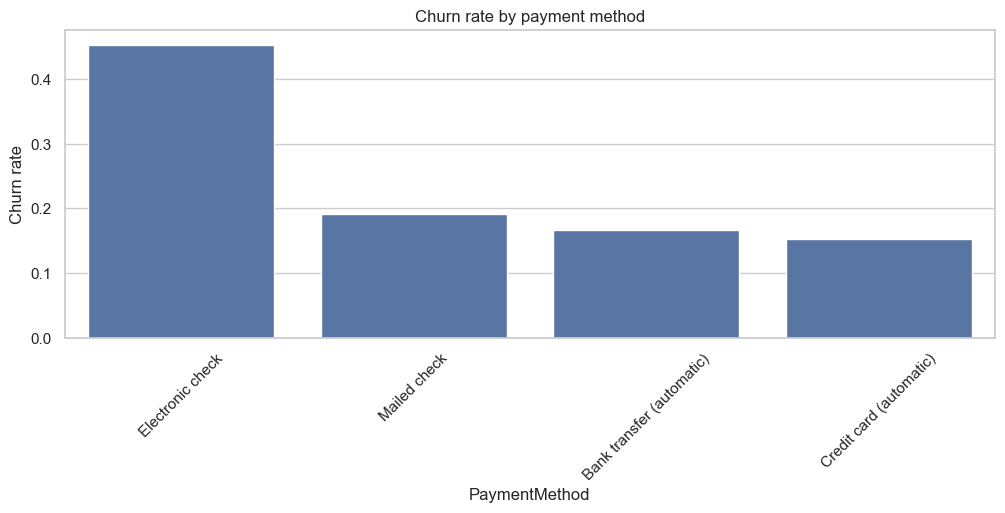

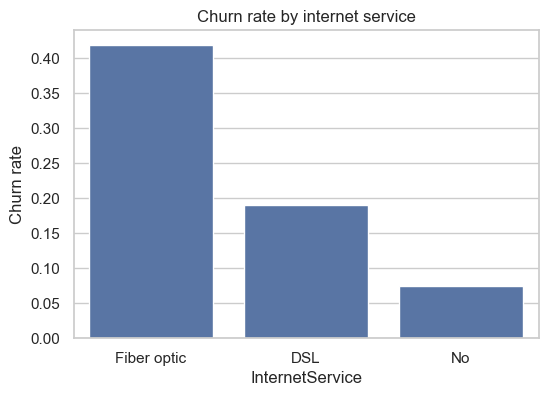

In [5]:
#Cell 4 – bar plots (visual churn by segment)
plt.figure(figsize=(10, 4))
sns.barplot(x=churn_by_contract.index, y="churn_rate", data=churn_by_contract.reset_index())
plt.title("Churn rate by contract type")
plt.ylabel("Churn rate")
plt.show()

plt.figure(figsize=(12, 4))
sns.barplot(x=churn_by_payment.index, y="churn_rate", data=churn_by_payment.reset_index())
plt.title("Churn rate by payment method")
plt.ylabel("Churn rate")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_by_internet.index, y="churn_rate", data=churn_by_internet.reset_index())
plt.title("Churn rate by internet service")
plt.ylabel("Churn rate")
plt.show()

In [6]:
#Cell 5 – simple revenue and revenue churn
#MonthlyCharges is monthly revenue per customer
df["MonthlyRevenue"] = df["MonthlyCharges"]

total_mrr = df["MonthlyRevenue"].sum()
churned_mrr = df.loc[df["Churn"] == 1, "MonthlyRevenue"].sum()

print("Total Monthly Recurring Revenue (MRR): {:.2f}".format(total_mrr))
print("MRR from churned customers: {:.2f}".format(churned_mrr))
print("Revenue churn rate: {:.2%}".format(churned_mrr / total_mrr))


Total Monthly Recurring Revenue (MRR): 455661.00
MRR from churned customers: 139130.85
Revenue churn rate: 30.53%


            churn_rate
tenure_bin            
0–6           0.533333
6–12          0.358865
12–24         0.287109
24–48         0.203890
48–72         0.095132


/var/folders/zx/z_9sjyrs6qv926g669nqxd1w0000gn/T/ipykernel_9547/687576722.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby("tenure_bin")["Churn"].mean().to_frame("churn_rate")


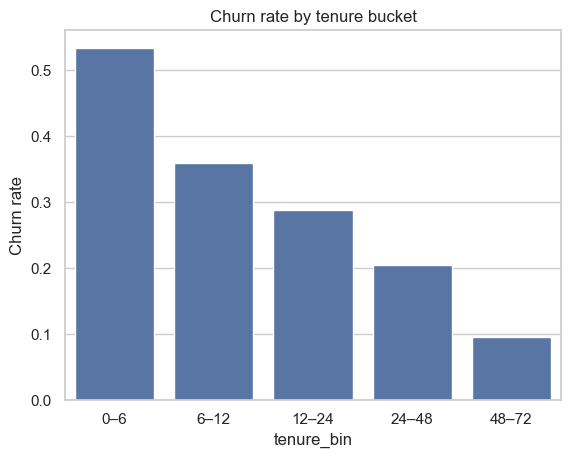

In [7]:
#Cell 3 - Tenure and lifecycle analysis
bins = [0, 6, 12, 24, 48, 72]
labels = ["0–6", "6–12", "12–24", "24–48", "48–72"]
df["tenure_bin"] = pd.cut(df["tenure"], bins=bins, labels=labels, right=True)

tenure_churn = df.groupby("tenure_bin")["Churn"].mean().to_frame("churn_rate")
print(tenure_churn)

sns.barplot(x=tenure_churn.index, y="churn_rate", data=tenure_churn.reset_index())
plt.title("Churn rate by tenure bucket")
plt.ylabel("Churn rate")
plt.show()
